In [246]:
import torch

def multiply(Q, K):
    # Q -> (n, d)
    # K -> (d, n)
    # Result -> (n, n)
    result = torch.zeros(Q.size(0), K.size(1))
    for i in range(Q.size(0)):
        for j in range(K.size(1)):
            result[i, j] = torch.dot(Q[i,:], K[:,j])

    return result
            

def calculate_attention(Q, K, V, B):
    n, d = Q.size()

    # Calculate the dot product of Q and K
    attention_scores = multiply(Q, K.transpose(-2, -1))

    # Normalize the attention scores by dividing by d.
    attention_scores = attention_scores / d

    # Numerical stability
    attention_scores -= B*B
    
    # Apply softmax to get the attention weights
    attention_weights = torch.softmax(attention_scores, dim=-1)
    
    # Multiply the attention weights with the value vectors
    attention_output = torch.matmul(attention_weights, V)
    
    return attention_output

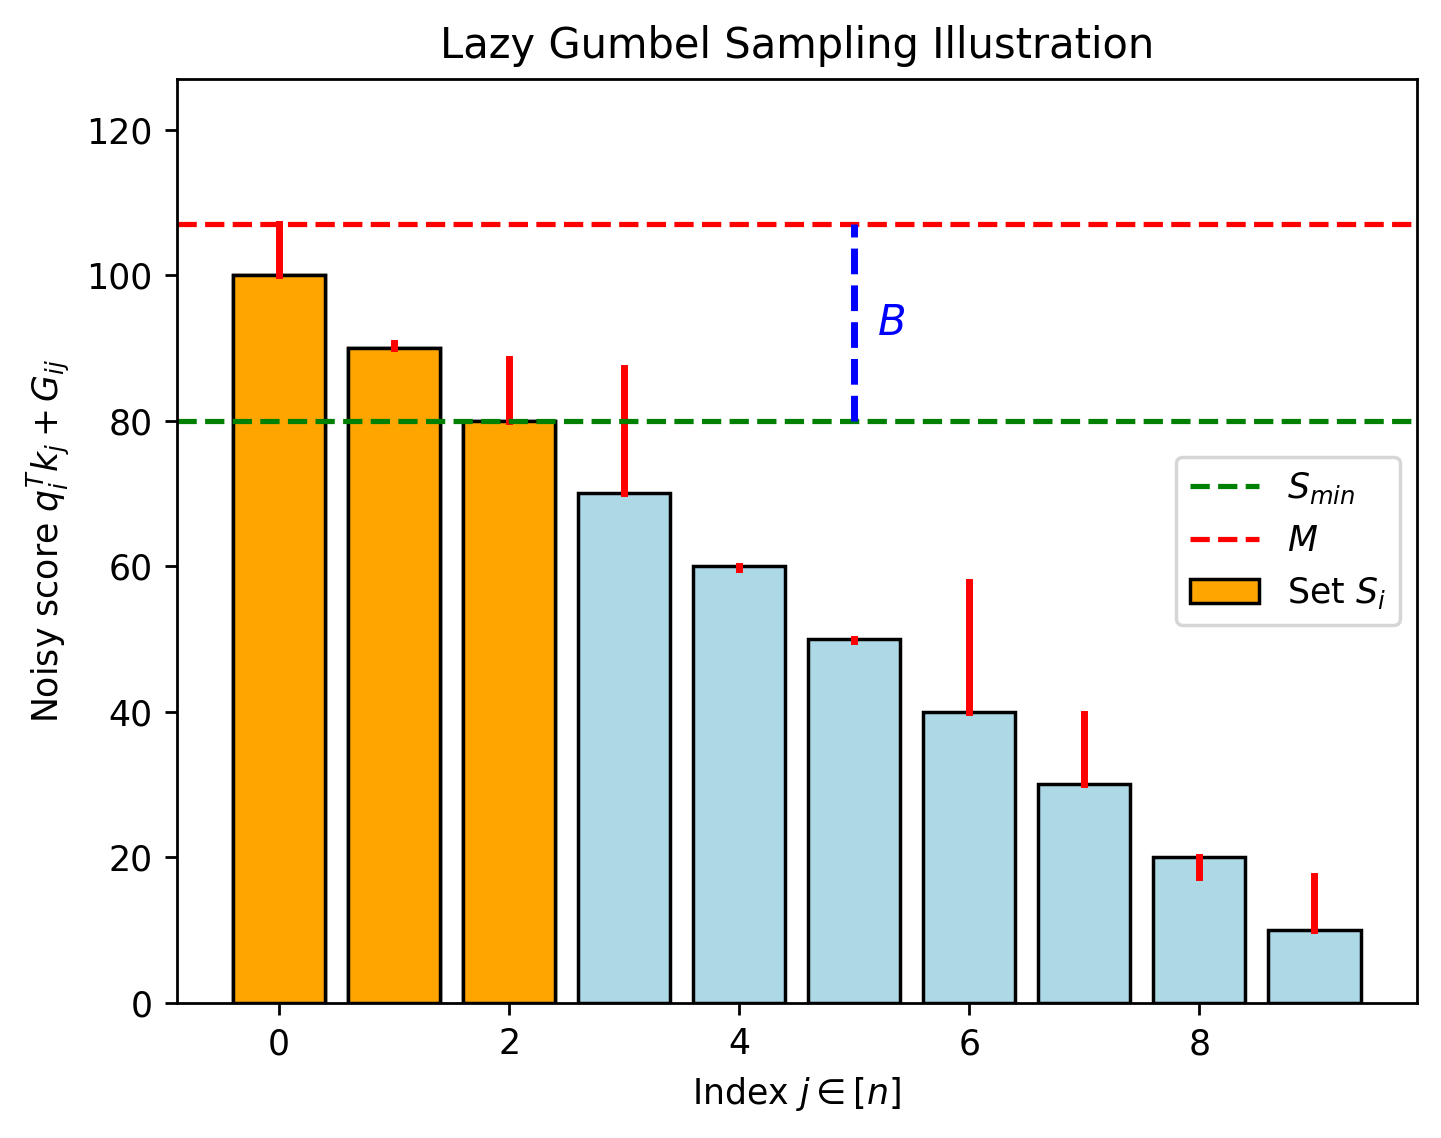

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']= 250

# Generate a decreasing histogram
np.random.seed(42)
num_bins = 10
frequencies = np.linspace(100, 10, num_bins)

# Add noise to the histogram
noise = np.random.normal(2, 10, num_bins)
noisy_frequencies = frequencies + noise

# Define the small set S (e.g., first 3 bins)
S = frequencies[:3]
S_noisy = noisy_frequencies[:3]

# Plot the histogram with noise
plt.bar(range(num_bins), frequencies, color='lightblue', edgecolor='black')

# Add noise as small lines on top of each bar
for i in range(num_bins):
    plt.plot([i, i], [frequencies[i], noisy_frequencies[i]], color='red', linewidth=2)

# Highlight the set S in a different color
plt.bar(range(len(S)), frequencies[:len(S)], color='orange', edgecolor='black', label=r'Set $S_i$')

# Draw the gap
min_freq_in_S = min(S)
max_freq_in_S_with_noise = max(S_noisy)
plt.axhline(y=min_freq_in_S, color='green', linestyle='--', label='$S_{min}$')
plt.axhline(y=max_freq_in_S_with_noise, color='red', linestyle='--', label='$M$')

# Draw the vertical line representing the gap
gap_x_position = len(S) - 1 + 3  # Position the line between the last bar of S and the next bar
plt.vlines(x=gap_x_position, ymin=min_freq_in_S, ymax=max_freq_in_S_with_noise, color='blue', linestyle='--', linewidth=2)

# Annotate the gap
plt.text(gap_x_position + 0.2, (min_freq_in_S + max_freq_in_S_with_noise) / 2, '$B$', 
         verticalalignment='center', fontsize=12, color='blue')

# Adjust plot limits to create space above the bars
plt.ylim(0, max(noisy_frequencies) + 20)

# Labels and legend
plt.xlabel('Key index $j\in[n]$')
plt.ylabel('Noisy score $q_i^T k_j + G_{ij}$')
plt.title('Lazy Gumbel Sampling Illustration')
plt.legend()

# Show the plot
plt.show()


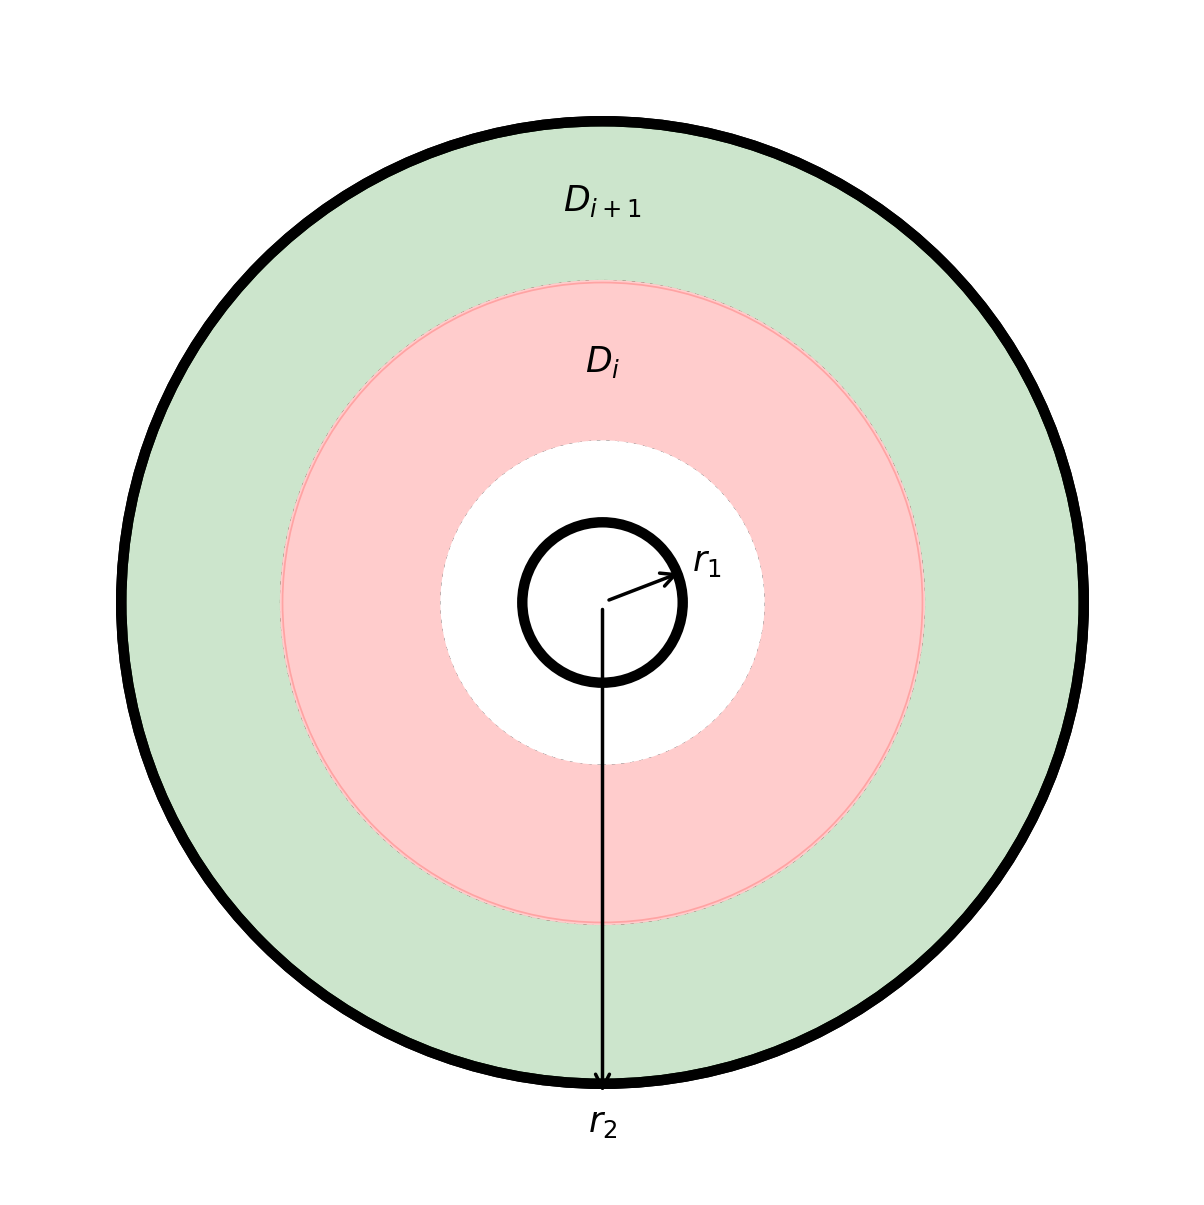

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes objects with increased size
fig, ax = plt.subplots(figsize=(6, 6))

mpl.rcParams['figure.dpi']= 250


# Define radii for the circles
radius_inner = 1
radius_outer = 6

# Create the two main circles (bolded)
circle_inner = plt.Circle((0, 0), radius_inner, fill=False, linewidth=3) 
circle_outer = plt.Circle((0, 0), radius_outer, fill=False, linewidth=3) 

# Add two more circles with dotted lines
circle_dotted1 = plt.Circle((0, 0), 2, fill=False, linestyle='dotted')
circle_dotted2 = plt.Circle((0, 0), 4, fill=False, linestyle='dotted')

# Add the circles to the axes
ax.add_artist(circle_inner)
ax.add_artist(circle_outer)
ax.add_artist(circle_dotted1)
ax.add_artist(circle_dotted2)

# Set aspect ratio to equal to ensure circles look circular
ax.set_aspect('equal')

# Zoom out factor (adjust as needed)
zoom_factor = 1.2

# Set plot limits to show the entire circles with extra space
ax.set_xlim(-radius_outer * zoom_factor, radius_outer * zoom_factor) 
ax.set_ylim(-radius_outer * zoom_factor, radius_outer * zoom_factor)

# Fill the space between the first and second dotted circles with light red
outer_circle_red = plt.Circle((0, 0), 4, fill=True, color="red", alpha=0.2)
inner_circle_red = plt.Circle((0, 0), 2, fill=True, color="white") 
ax.add_artist(outer_circle_red)
ax.add_artist(inner_circle_red)

# Fill the space between the last dotted circle and the outer circle with green
outer_circle_green = plt.Circle((0, 0), radius_outer, fill=True, color="green", alpha=0.2)
inner_circle_green = plt.Circle((0, 0), 4, fill=True, color="white") 
ax.add_artist(outer_circle_green)
ax.add_artist(inner_circle_green)

# Re-add the outermost circle to bring it back on top
ax.add_artist(circle_outer)

# Re-add the red band's outer circle to ensure it's visible
ax.add_artist(outer_circle_red) 

# Re-add the first dotted circle to make it visible again
ax.add_artist(circle_dotted1)

# Add a white circle on top to "erase" the red from the center
white_circle = plt.Circle((0, 0), 2, fill=True, color="white") 
ax.add_artist(white_circle)

# Re-add the innermost circle one more time to ensure it's on top
ax.add_artist(circle_inner) 

# Add labels for the green and red bands
ax.text(0, 5, r'$D_{i+1}$', ha='center', va='center')
ax.text(0, 3, r'$D_i$', ha='center', va='center')

# Add arrows and labels for r_1 and r_2 (pointing outwards, reaching circles, text below)
ax.annotate(r'$r_1$', xy=(0, 0), xytext=(radius_inner+0.3, 0.5), # Text below
            arrowprops=dict(arrowstyle='<-', connectionstyle='arc3,rad=0'),
            ha='center', va='center')
ax.annotate(r'$r_2$', xy=(0, 0), xytext=(0, -radius_outer-0.7), # 90-degree angle, text below
            arrowprops=dict(arrowstyle='<-', connectionstyle='arc3,rad=0'),
            ha='center', va='bottom') # va='bottom' to place text below

# Remove the axes
ax.axis('off') 

# Display the plot
plt.show()

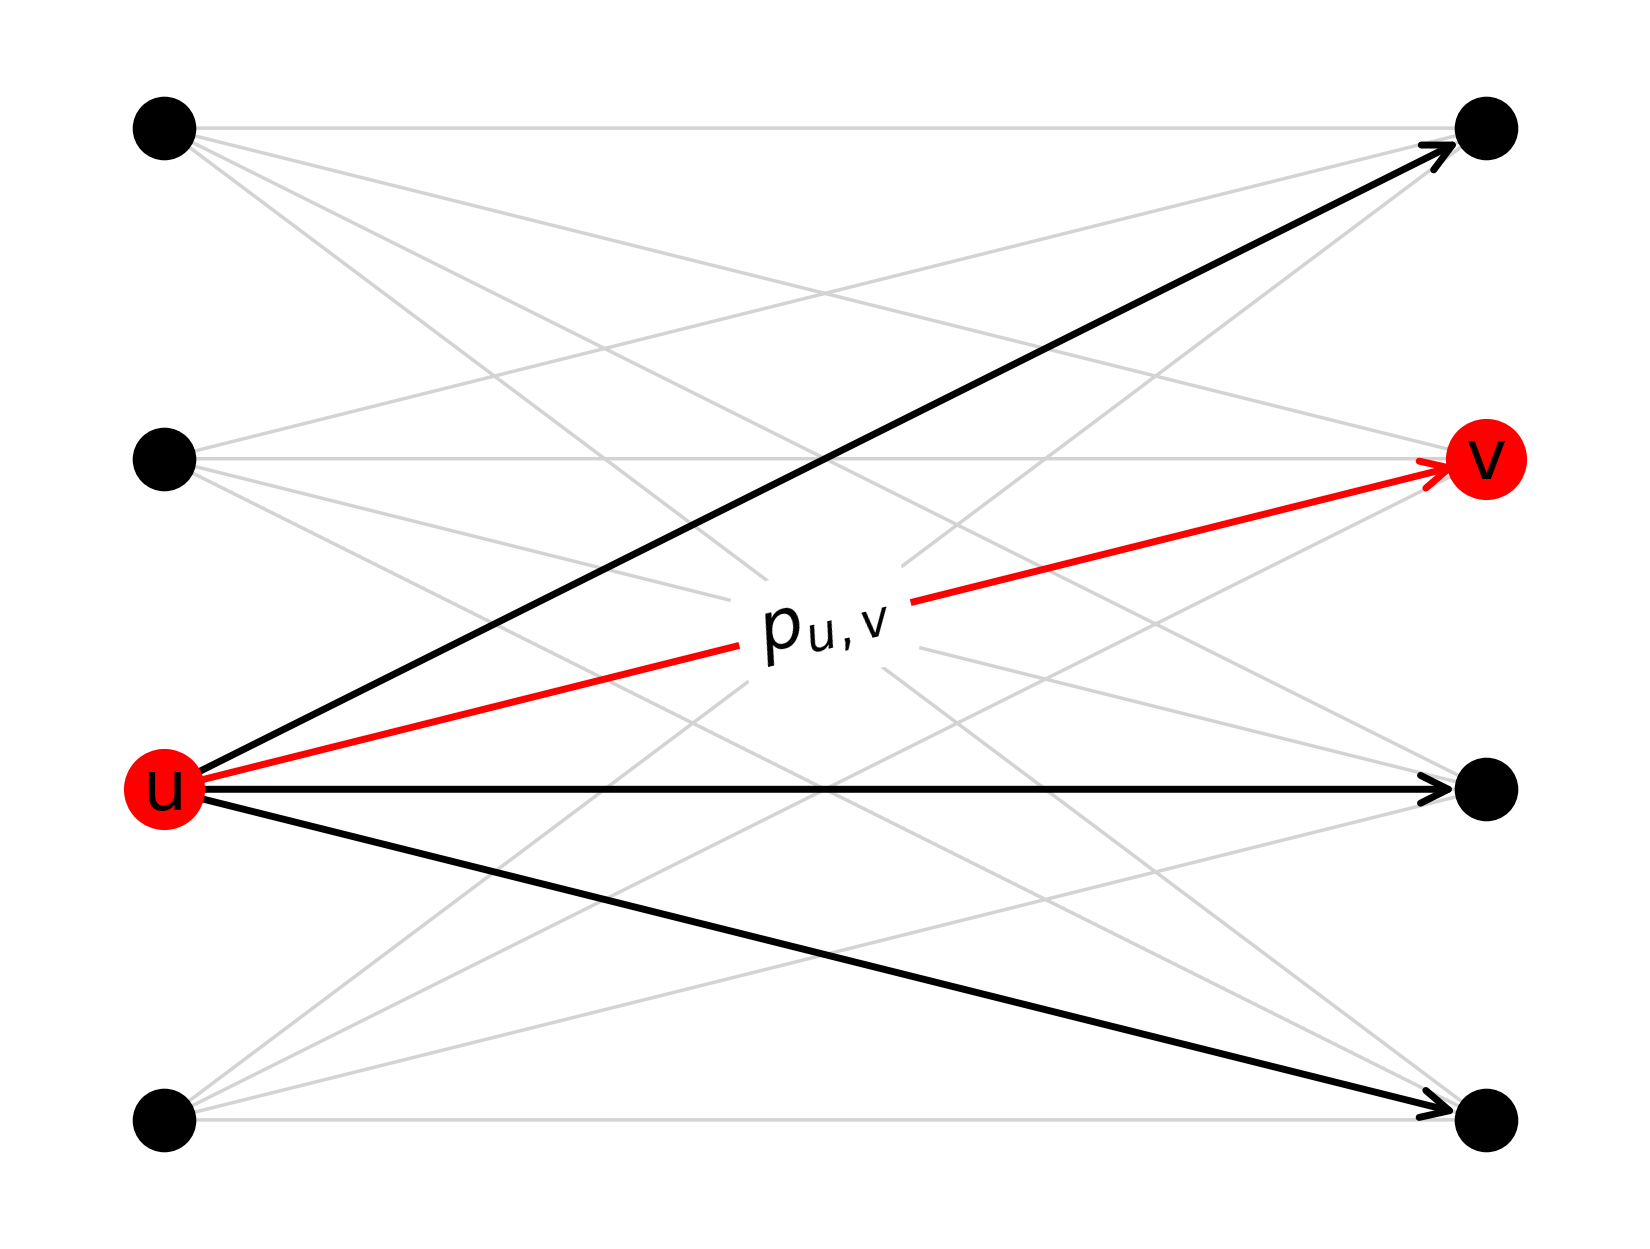

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

mpl.rcParams['figure.dpi']= 250

# Create the bipartite graph
G = nx.complete_bipartite_graph(4, 4)

# Position nodes for bipartite layout
pos = {}
pos.update((n, (0, i)) for i, n in enumerate(range(4)))  # left nodes
pos.update((n, (1, i)) for i, n in enumerate(range(4, 8)))  # right nodes

# Highlight specific nodes and edge
highlighted_nodes = [1, 6]  # u and v
highlighted_edge = (1, 6)

bold_edges = [(1,4),(1,5),(1,7)]

# Draw the graph
nx.draw(G, pos, with_labels=False, node_color='black', edge_color='lightgray', arrows=True)

# Highlight the specific nodes and edge
nx.draw_networkx_nodes(G, pos, nodelist=highlighted_nodes, node_color='red',node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=[highlighted_edge], edge_color='red', width=2, arrowstyle='->', arrowsize=20,arrows=True) 
nx.draw_networkx_edges(G, pos, edgelist=bold_edges, edge_color='black', width=2, arrowstyle='->', arrowsize=20,arrows=True) 

# Add labels
labels = {1: 'u', 6: 'v'}
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_color='black')

# Add edge label
edge_labels = {(1, 6): '$p_{u,v}$'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, font_color='black')

plt.show()

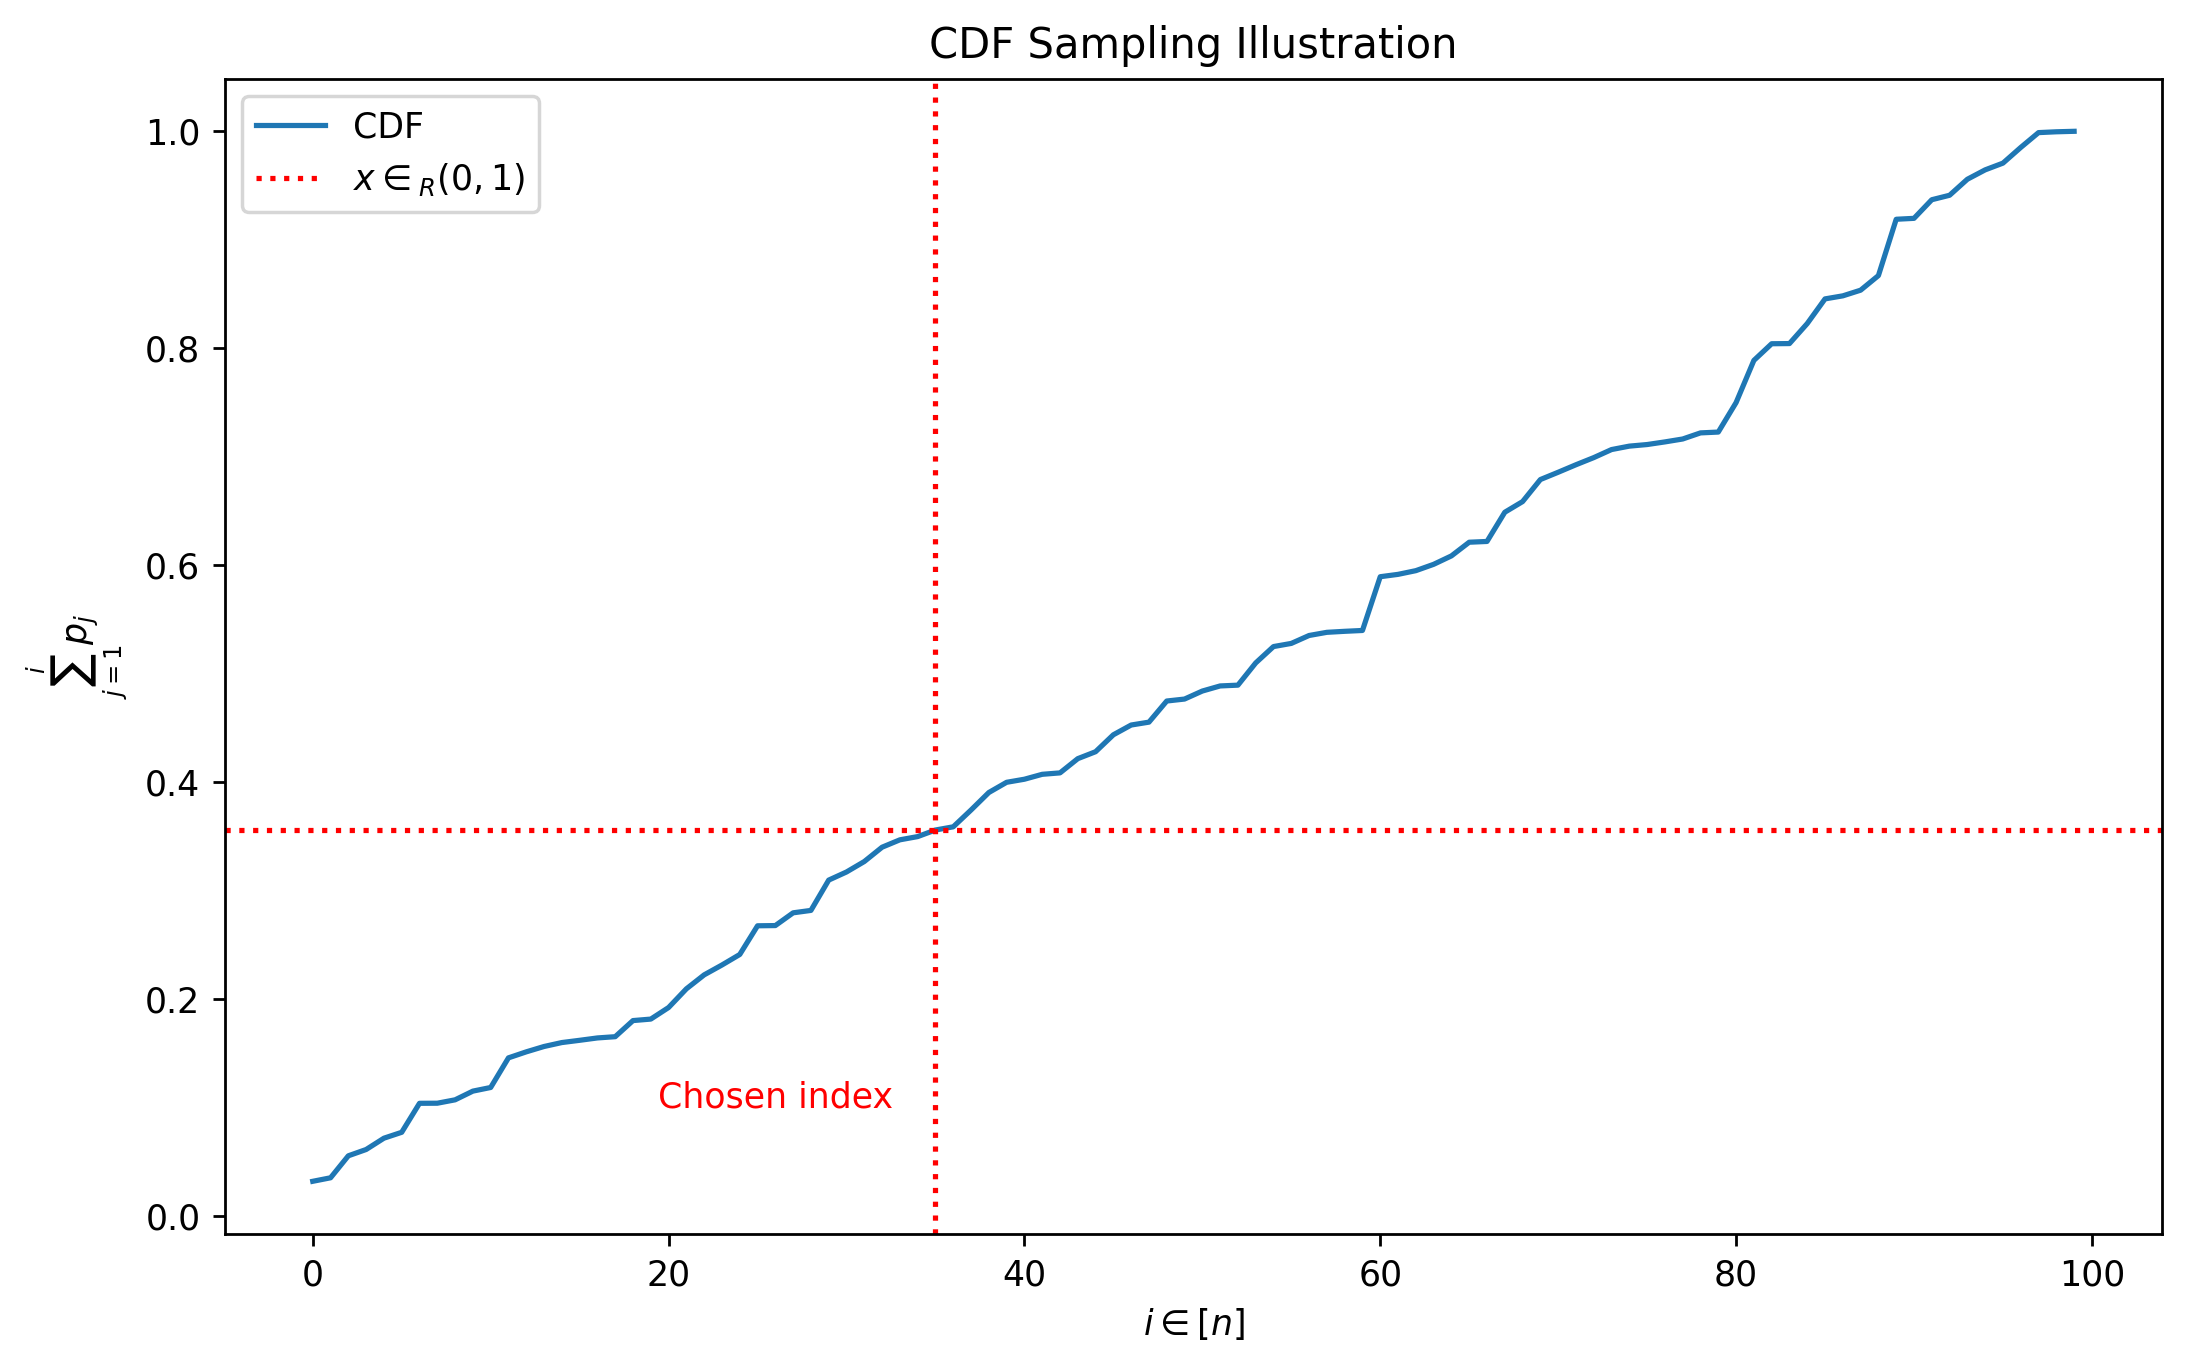

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250


# Create n and the probability distribution
n = np.arange(100)
p = np.random.dirichlet(np.ones(100), size=1)[0]  # Dirichlet distribution ensures probabilities sum to 1

# Calculate CDF
cdf = np.cumsum(p)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n, cdf, label='CDF')

# Pick random x and find its bucket
x = np.random.rand()
bucket_index = np.searchsorted(cdf, x) 

# Plot dotted lines
plt.axvline(x=n[bucket_index], color='red', linestyle='dotted', label=f'$x\in_R (0,1)$')
plt.axhline(y=cdf[bucket_index], color='red', linestyle='dotted')

# Add text label to mark the bucket
plt.text(n[bucket_index]-9, 0.1, f'Chosen index', color='red', fontsize=10, ha='center') 

# Add labels, title and legend
plt.xlabel('$i \in [n]$')
plt.ylabel('$\sum_{j=1}^{i} p_j$')
plt.title('CDF Sampling Illustration')
plt.legend()

# Show the plot
plt.show()

In [45]:
# Generate 50x50 random matrices with elements in range [-10, 10]
Q = torch.randint(-10, 11, (50, 50)).float()
K = torch.randint(-10, 11, (50, 50)).float()
V = torch.randint(-10, 11, (50, 50)).float()

# Call the calculate_attention function
attention_output = calculate_attention(Q, K, V, B=10.0)

# Print the attention output
print(attention_output) 


tensor([[-7.5545e+00, -1.0099e+00, -7.7820e+00,  ...,  6.8297e+00,
          7.6803e+00,  7.6429e+00],
        [-7.4637e+00, -4.9500e+00,  4.2071e+00,  ...,  5.0288e+00,
         -6.3750e-03, -7.4135e+00],
        [ 1.1425e+00, -5.0924e-01, -1.3612e+00,  ...,  1.9775e+00,
         -4.6699e+00,  1.2864e+00],
        ...,
        [ 4.9724e+00,  3.8048e-02, -9.8822e+00,  ...,  4.9183e+00,
          3.0044e+00,  4.9205e+00],
        [ 5.7137e+00, -4.0068e+00,  1.7566e+00,  ..., -3.7334e-01,
          2.4066e+00,  2.5427e+00],
        [-2.9471e+00,  1.0142e+00, -5.5731e+00,  ...,  6.0247e+00,
          8.5180e+00, -1.2846e+00]])


In [169]:
# 
# Find top-k indices of inner products q^T k_i for every query q and set of keys K
# This is done naively here, in O(n^2) time
# 
def topk_indices_naive(Q, K, k, B, lsh_objects=None):
    n, d = K.size()

    # Calculate the dot product of Q and K
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) 

    # Normalize the attention scores by dividing by d.
    attention_scores = attention_scores / d

    # Apply the exponential function to the attention scores
    attention_scores = torch.exp(attention_scores - B * B)
    
    # Find the top-k indices of the attention scores
    topk_scores, topk_indices = torch.topk(attention_scores, k, dim=-1)
    
    return topk_scores, topk_indices

In [33]:
# Example:
q = torch.tensor([[1, 0, 0, 1]])
K = torch.tensor([[1, 2, 3, 9], [4, 5, 6, 8], [7, 8, 9, 1]])

topk_indices_naive(q, K, 2, 10)

(tensor([[7.4689e-43, 4.5262e-43]]), tensor([[1, 0]]))

In [234]:
import numpy

#
# Approximating the expected value of a value vector v with underlying distribution
# p(i) = softmax(q^T k_i) / Z, where Z is the partition function
# 
# Parameters:
#   q is the query vector: 1 x d
#   K is the matrix of key vectors: n x d
#   v is the value vector: 1 x n
#   k is the number of top-k elements to consider
#   l is the number of samples to draw from the remaining elements
#   topk_indices_func is a function that returns the top-k indices of the attention scores
#   B is the maximum value of the q,k,v elements. We use this to avoid numerical instability.
# 
def approximate_softmax_expectation(q, K, v, k, l, topk_indices_func, B, lsh_objects=None):
    n, d = K.size()

    # Find the top-k indices of the attention scores
    scores, indices = topk_indices_func(q, K, k, B, lsh_objects)

    # From the n-k remaining elements, draw l samples.
    random_indices = []
    while len(random_indices) < l:
        index = numpy.random.randint(n)
        if index not in indices:
            random_indices.append(index)

    # Now we'll evaluate the partition function and the expectation separately.

    approx_partition = 0
    approx_expectation = 0
    for index in random_indices:
        # Calculate the attention score for the remaining elements
        attention_score = torch.exp(torch.dot(q, K[index]) / d - B*B)

        # Add the attention score to the partition function
        approx_partition += attention_score

        # Add the attention score times the value to the expectation
        approx_expectation += attention_score * v[index]

    approx_partition *= ((n-k) / l)
    approx_expectation *= ((n-k) / l)

    approx_partition += scores.sum()
    approx_expectation += torch.sum(scores * v[indices])

    # Return the approximate softmax partition function.
    return approx_expectation / approx_partition


In [239]:
# 
# Approximates the attention output using sampling.
# 
# Parameters:
#   Q is the matrix of query vectors: n x d
#   K is the matrix of key vectors: n x d
#   V is the matrix of value vectors: n x d
#   k is the number of top-k elements to consider
#   l is the number of samples to draw from the remaining elements
#   topk_indices_func is the function to find the top-k indices
def sampling_attention(Q, K, V, k, l, topk_indices_func, B, lsh_objects=None):

    output = torch.zeros_like(V)

    # For all rows in Q...
    for i in range(Q.size(0)): # n
        # For all columns in V...
        for j in range(V.size(1)): # d
            # print(i,j)
            # Approximate the expected value of the value vector
            output[i, j] = approximate_softmax_expectation(Q[i], K, V[:,j], k, l, topk_indices_func, B, lsh_objects)

    return output

In [170]:
import time

# Generate 50x50 random matrices with elements in range [-10, 10]
Q = torch.randint(-10, 11, (200, 200)).float()
K = torch.randint(-10, 11, (200, 200)).float()
V = torch.randint(-10, 11, (200, 200)).float()

# Call the sampling_attention function.
# Measure the time it takes to run the function.
start_time = time.time()
attention_output = sampling_attention(Q, K, V, 50, 50, topk_indices_naive, B=10.0)
end_time = time.time()
print("Time taken for approximate attention:", end_time - start_time)

# Compare with the exact attention output
# Calculate the time taken to run the calculate_attention function.
start_time = time.time()
exact_attention_output = calculate_attention(Q, K, V, B=10.0)
end_time = time.time()
print("Time taken for exact attention:", end_time - start_time)

# Print the mean absolute error
print("Mean error: ", torch.mean(torch.abs(attention_output - exact_attention_output)))

Time taken for approximate attention: 45.084949016571045
Time taken for exact attention: 0.007837057113647461
Mean error:  tensor(4.4101)


In [289]:
import math
import numpy as np

class angularLSH:
    def __init__ (self, K, s, b, B, verbose=False):
        self.K = K.clone()
        self.s = s
        self.b = b
        self.n, self.d = self.K.size()

        # Normalize the key vectors by dividing with d:
        self.K = self.K / self.d

        # Normalize further by dividing all the key vectors by B*B
        self.K = self.K / (B*B)

        # Now add an extra dimension to the key vectors to 
        # make them all have norm 1. Now all the key vectors have d+1 dimensions.
        self.K = torch.cat((self.K, torch.sqrt(1 - torch.sum(self.K**2, dim=1, keepdim=True))), dim=1)
        self.d += 1

        # LSH works as follows:
        # 1. To hash a single vector, concatenate k = O(log n) smaller hashes. 
        #    That's one hash table. That means we have 2^k = O(n) buckets
        # 2. Maintain L = n^s hash tables where s = log(1-arccos(b)/pi) / log(1-arccos(s)/pi)
        self.k = int(0.5 * math.ceil(math.log2(self.n) / (-math.log2(1-np.arccos(self.s)/math.pi))))

        # Note: Heuristic -> multiply L exponent by a < 1? This is tweakable.
        self.L = 0.5 * math.log2(1-np.arccos(self.b)/math.pi) / math.log2(1-np.arccos(self.s)/math.pi) 

        if verbose:
            print(f"Power of L: {self.L}")
        self.L = int(math.pow(self.n, self.L))

        if verbose:
            print(f"Creating {self.L} hash tables with {self.k} bits each.")

        # A hash is just the sign of the dot product of the vector 
        # with a random vector on the unit sphere.
        # (Coordinates are drawn from a Gaussian distribution.)
        self.hash_vectors = torch.randn(self.L, self.k, self.d)

        # We'll store L hash tables, each with 2^k buckets. Each bucket
        # will store a list of indices of the key vectors.
        self.hash_tables = [{} for _ in range(self.L)]

        # Now we hash all the key vectors L times:
        for i in range(self.n):
            ki = self.K[i] # Get the i-th key vector: 1 x d

            # Compute the hash of the key vector for all L hash tables.
            for j in range(self.L):
                hj = self.hash(ki, self.hash_vectors[j]) # number between 0 and 2^k - 1

                # Add the index of the key vector to the corresponding bucket.
                if hj not in self.hash_tables[j]:
                    self.hash_tables[j][hj] = []

                self.hash_tables[j][hj].append(i)

    #
    # Hash a single vector x using the hash function h.
    # h consists of k random vectors on the unit sphere.
    #
    # Parameters:
    #  x is the input vector: 1 x (d+1)
    #  h is the hash function: k x (d+1)
    # 
    # Returns:
    #  The hash of the input vector x: a number between 0 and 2^k - 1
    # 
    def hash(self, x, h):
        # If the input vector x has d dimensions, we add an extra dimension of 0.
        # This is needed for the query vectors, but not the key vectors because
        # we already added an extra dimension to them.
        x = x.clone()
        if len(x) == self.d - 1:
            # print("Extending x")
            x = torch.cat((x, torch.tensor([0.0])))

        hash_value = 0
        for i in range(self.k):
            # print(f"Dot product: {x} and {h[i]}")
            if torch.dot(x, h[i]) >= 0:
                hash_value += 2**i

        return hash_value

    # Function to query how many (and which) key vectors are in the same bucket 
    # as the query vector q.
    # 
    # We limit the number of returned key vectors to max_results.
    # We also require the keys to have a dot product of at most cr with the query vector.
    #
    # Runtime: O(max(max_results, number of keys in the bucket))
    def query_bucket_size(self, q, max_results):
        distinct_keys = set()
        for j in range(self.L):
            hj = self.hash(q, self.hash_vectors[j])

            # print(f"Query in hash table {j} was hashed at bucket {hj}")

            if hj in self.hash_tables[j]:
                for key_index in self.hash_tables[j][hj]:

                    # Check if the key vector has a dot product of at most cr with the query vector.
                    if torch.dot(q, self.K[key_index]) >= self.b:
                        continue
                    
                    # Add the key index to the set of distinct keys.
                    distinct_keys.add(key_index)

                    # If we have reached the maximum number of results, return the keys.
                    if len(distinct_keys) >= max_results:
                        return distinct_keys, len(distinct_keys)
                    
        # print("Found", len(distinct_keys), "distinct keys.")

        return distinct_keys, len(distinct_keys)
    
    def print_buckets(self):
        print(f"Printing {self.L} hash tables:")
        for j in range(self.L):
            print("Hash table", j)
            for key in self.hash_tables[j]:
                print(key, ":", self.hash_tables[j][key])
            print()


In [287]:
# We will create a sequence of concentric LSH objects with increasing r values.
def topk_indices_lsh_preprocessing(K, B, verbose=False):
    # !! Note !! - c requires tweaking! 
    c = 0.05
    current_s = 0

    print(f"Creating {int(1/(c)) - 1} LSH objects.")

    # We will create a sequence of LSH objects with increasing r values.
    lsh_objects = []
    while current_s < 1 - 2*c:
        lsh_objects.append(angularLSH(K, s=current_s, b=current_s+c, B=B, verbose=verbose))
        current_s += c

    return lsh_objects

In [298]:
# This function finds the top-k inner products q^T k_i for a query q and a set of 
# keys K. It does so in O(k) time by using the concentric circle LSH idea.
#
# Requires topk_indices_lsh_preprocessing() to be run first.
# 
# Parameters:
#   q is the query vector: 1 x d
#   K is the matrix of key vectors: n x d
#   k is the number of top-k elements to consider
#   B is the maximum value of the q,k,v elements. We use this to avoid numerical instability.
#   lsh_objects is a list of LSH objects with increasing s values.
def topk_indices_fast_lsh(q, K, k, B, lsh_objects, verbose=False):

    # print("topk_indices_fast_lsh - entering function")

    n, d = K.size()

    q_copy = q.clone().float()

    # If the query vector q has d dimensions, we add an extra dimension of 0.
    q_normalized = q.clone()
    q_normalized = torch.cat((q_normalized, torch.tensor([0.0])))

    # Normlize q to have norm 1.
    q_normalized = q_normalized / torch.norm(q_normalized)

    keys_before = set()
    keys_after = set()

    # Find the first LSH object where at least k keys are hashed to the same bucket as the query vector.
    for i in range(len(lsh_objects)):
        if i > 0:
            keys_before = keys_after

        keys_after, num_keys = lsh_objects[i].query_bucket_size(q_normalized, 2 * k)

        if verbose:
            print("Lsh object", i, "has", num_keys, "keys. These are: ", keys)
        
        print(num_keys)
        if num_keys >= k:
            break

    # Now we have two LSH objects, so that the first one has less than k keys
    # hashed to the same bucket as the query vector, and the second one has at least k keys.
    # We will take all the keys from the first one and supplement with keys from the second one.

    if verbose:
        print(keys_before)
        print(keys_after)

    keys = keys_before
    for key in keys_after:
        if key not in keys:
            keys.add(key)

        if len(keys) >= k:
            break

    # Now we have the top-k keys. We will calculate the attention scores for these keys.
    attention_scores = torch.zeros(len(keys))
    for i, key in enumerate(keys):
        attention_scores[i] = torch.dot(q_copy, (K[key, :]/d)) - B*B
        attention_scores[i] = torch.exp(attention_scores[i])

    # print("topk_indices_fast_lsh - exiting function")

    return attention_scores, list(keys)

In [165]:
# Example:
q = torch.tensor([[1, 0, 0, 1]])
K = torch.tensor([[1, 2, 3, 9], [4, 5, 6, 8], [7, 8, 9, 1]])

print("Naive answer:")
print(topk_indices_naive(q, K, 2, 2))
print()

lsh_objects = topk_indices_lsh_preprocessing(K, B=10.0)

assert len(lsh_objects) != 0, "Should create at least one LSH object." 

print(f"\n---\nCreated {len(lsh_objects)} LSH objects.\n---\n")

for lsh_object in lsh_objects:
    lsh_object.print_buckets()

print(topk_indices_fast_lsh(q[0], K, 2, 2.0, lsh_objects, verbose=False))


Naive answer:
(tensor([[0.3679, 0.2231]]), tensor([[1, 0]]))

Creating 4 LSH objects.
Power of L: 0.804258719533377
Creating 2 hash tables with 2 bits each.
Power of L: 0.75965463755723
Creating 2 hash tables with 2 bits each.
Power of L: 0.6552495395524321
Creating 2 hash tables with 2 bits each.

---
Created 3 LSH objects.
---

Printing 2 hash tables:
Hash table 0
3 : [0, 1, 2]

Hash table 1
3 : [0, 1, 2]

Printing 2 hash tables:
Hash table 0
1 : [0, 1, 2]

Hash table 1
2 : [0, 1, 2]

Printing 2 hash tables:
Hash table 0
3 : [0, 1, 2]

Hash table 1
0 : [0, 1, 2]

Query in hash table 0 was hashed at bucket 1
Query in hash table 1 was hashed at bucket 1
Lsh object 0 has 0 keys. These are:  set()
Query in hash table 0 was hashed at bucket 3
Query in hash table 1 was hashed at bucket 1
Lsh object 1 has 0 keys. These are:  set()
Query in hash table 0 was hashed at bucket 3
Lsh object 2 has 2 keys. These are:  {0, 1}
Query in hash table 0 was hashed at bucket 3
Query in hash table 1 was ha

In [300]:
import time

# Generate 50x50 random matrices with elements in range [-10, 10]
Q = torch.randint(-20, 21, (200, 30)).float()
K = torch.randint(-20, 21, (200, 30)).float()
V = torch.randint(-20, 21, (200, 30)).float()

# Call the sampling_attention function.
# Measure the time it takes to run the function.
start_time = time.time()
lsh_objects = topk_indices_lsh_preprocessing(K, B=10.0)

print("Pre-processing done in time ", time.time() - start_time)

# for lsh_object in lsh_objects:
#     lsh_object.print_buckets()

attention_output = sampling_attention(Q, K, V, 30,30, topk_indices_fast_lsh, B=10.0, lsh_objects=lsh_objects)
end_time = time.time()
print("Time taken for approximate attention:", end_time - start_time)

# Compare with the exact attention output
# Calculate the time taken to run the calculate_attention function.
start_time = time.time()

# First run the preprocessing step to create the LSH objects.
exact_attention_output = calculate_attention(Q, K, V, B=10.0)
end_time = time.time()
print("Time taken for exact attention:", end_time - start_time)

# Print the mean absolute error
print("Mean error: ", torch.mean(torch.abs(attention_output - exact_attention_output)))

Creating 19 LSH objects.
Power of L: 0.47738737747826515
Creating 12 hash tables with 4 bits each.
Power of L: 0.47697935596487756
Creating 12 hash tables with 4 bits each.
Power of L: 0.4764649034307277
Creating 12 hash tables with 4 bits each.
Power of L: 0.4758328279212413
Creating 12 hash tables with 4 bits each.
Power of L: 0.4750678617048562
Creating 12 hash tables with 5 bits each.
Power of L: 0.4741495385645176
Creating 12 hash tables with 5 bits each.
Power of L: 0.47305052395091945
Creating 12 hash tables with 5 bits each.
Power of L: 0.47173411402236104
Creating 12 hash tables with 5 bits each.
Power of L: 0.47015042176170957
Creating 12 hash tables with 6 bits each.
Power of L: 0.4682304063680291
Creating 11 hash tables with 6 bits each.
Power of L: 0.46587620675045505
Creating 11 hash tables with 7 bits each.
Power of L: 0.46294482868840925
Creating 11 hash tables with 7 bits each.
Power of L: 0.45921917992518557
Creating 11 hash tables with 8 bits each.
Power of L: 0.4543